In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\asus\\Downloads\\Uber Request Data.csv')

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [5]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [7]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [8]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

# Cleaning & Handeling the data

In [9]:
df['Request timestamp'].unique()

array(['11/7/2016 11:51', '11/7/2016 17:57', '12/7/2016 9:17', ...,
       '15-07-2016 23:52:06', '15-07-2016 23:54:39',
       '15-07-2016 23:55:03'], dtype=object)

In [10]:
df['Drop timestamp'].unique()

array(['11/7/2016 13:00', '11/7/2016 18:47', '12/7/2016 9:58', ...,
       '13-07-2016 23:43:13', '15-07-2016 09:56:07', nan], dtype=object)

In [11]:
df['Request timestamp']=df['Request timestamp'].astype(str)
df['Request timestamp']=df['Request timestamp'].replace('/','-')
df['Request timestamp']=pd.to_datetime(df['Request timestamp']) 

In [12]:
df['Drop timestamp']=df['Drop timestamp'].astype(str)
df['Drop timestamp']=df['Drop timestamp'].replace('/','-')
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])

In [13]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [15]:
df['Hour']=df['Request timestamp'].dt.hour
df['Date']=df['Request timestamp'].dt.day

In [16]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Date
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


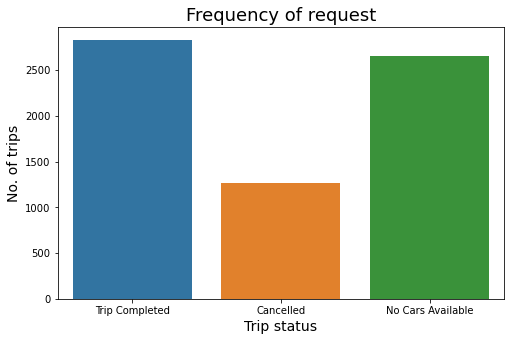

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Status", data=df)

plt.title("Frequency of request", fontsize = 18)
plt.xlabel("Trip status", fontsize = 14)
plt.ylabel("No. of trips", fontsize = 14)
plt.show()

In [18]:
grp = df.groupby('Status')['Request id'].count()

percent_completed = grp["Trip Completed"]/ len(df) * 100
percent_cancel = grp['Cancelled']/ len(df) * 100
percent_nocars = grp['No Cars Available']/ len(df) * 100

print("The percentage of trips completed: " + "{:.2f}".format(percent_completed))
print("The percentage of trips cancelled: " + "{:.2f}".format(percent_cancel))
print("The percentage of requests cancelled due to unavailability of cabs: " + "{:.2f}".format(percent_nocars))

The percentage of trips completed: 41.97
The percentage of trips cancelled: 18.74
The percentage of requests cancelled due to unavailability of cabs: 39.29


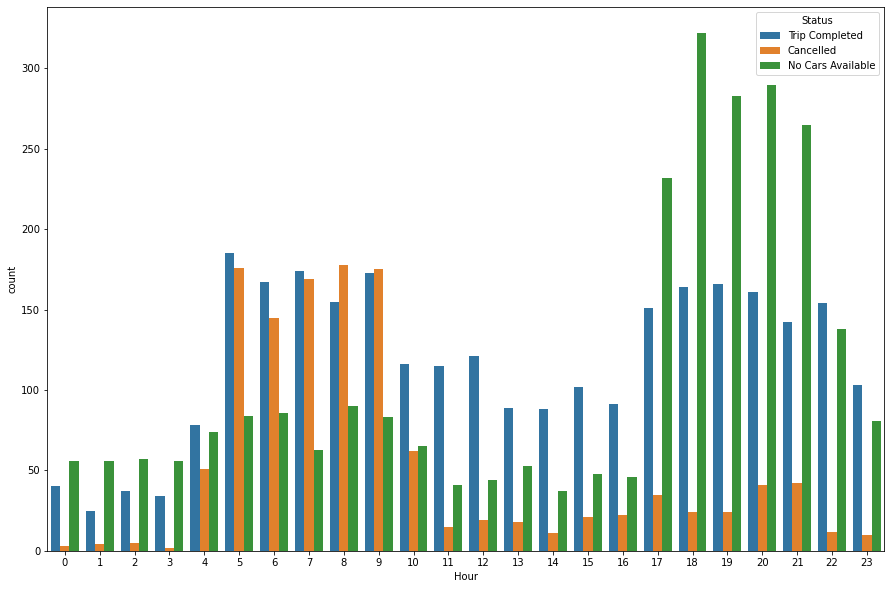

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x="Hour",data=df,hue="Status")
plt.show()

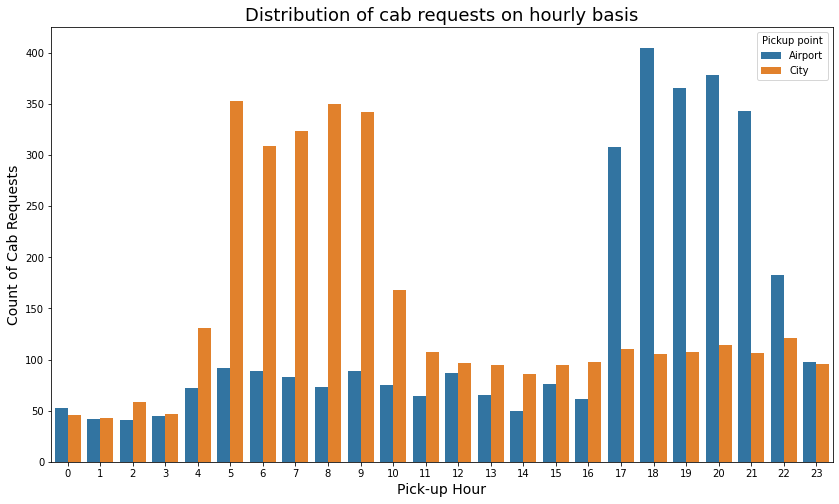

In [20]:
plt.figure(figsize=(14, 8))
sns.countplot(x = "Hour", hue = "Pickup point", data = df)

plt.title("Distribution of cab requests on hourly basis", fontsize = 18)
plt.xlabel("Pick-up Hour", fontsize = 14)
plt.ylabel("Count of Cab Requests", fontsize = 14)
plt.show()

There is a surge in the number of requests at night (5-9 PM) at the airport.
There is a surge in the number of requests in the morning (5-9 AM) in the city.

In [21]:
df["Time_Slot"]=0

In [22]:
j=0
for i in df["Hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_Morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning_Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j=j+1


In [23]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Date,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Day_Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush


In [28]:
df['Time_Slot'].unique()

array(['Day_Time', 'Evening_Rush', 'Morning_Rush', 'Pre_Morning',
       'Late_Night'], dtype=object)

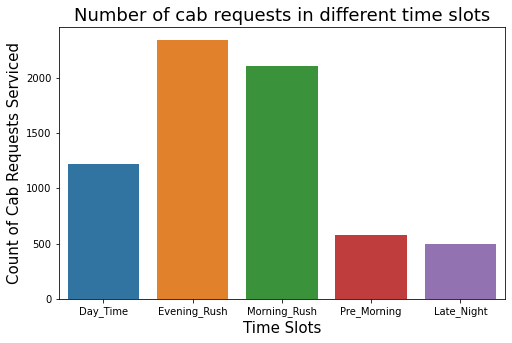

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Time_Slot')
plt.title("Number of cab requests in different time slots", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 15)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 15)
plt.show()

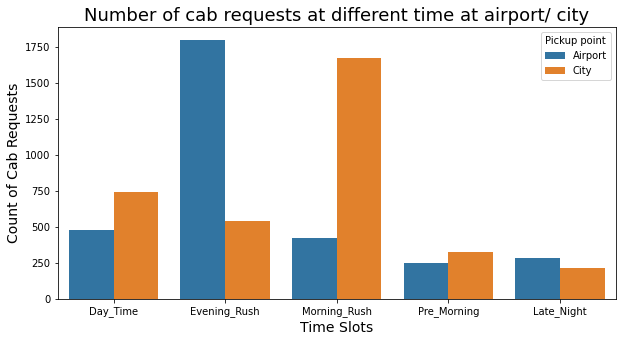

In [42]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "Time_Slot", data = df, hue = 'Pickup point')
plt.title("Number of cab requests at different time at airport/ city", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests", fontsize = 14)
plt.show()

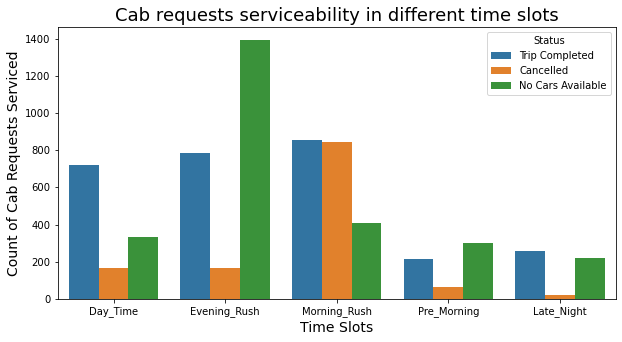

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "Time_Slot", hue = "Status", data = df)
plt.title("Cab requests serviceability in different time slots", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 14)
plt.show()

In [29]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']

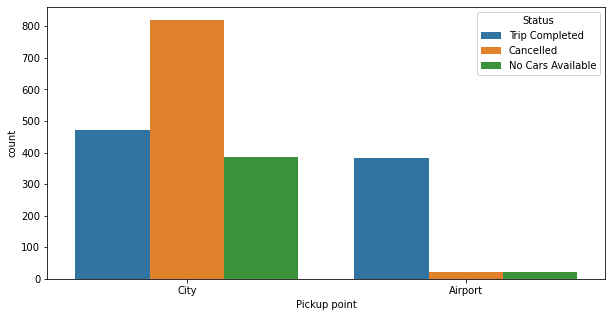

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_morning_rush,x='Pickup point',hue='Status')
plt.show()

In [31]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']

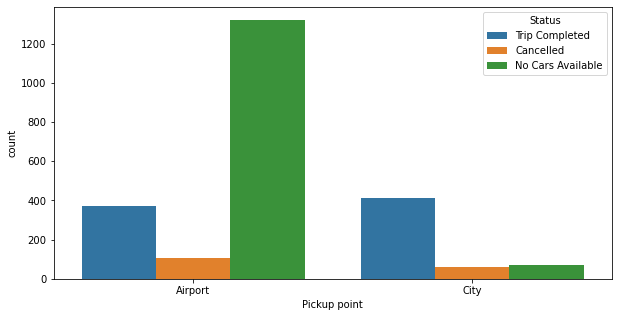

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_evening_rush,x='Pickup point',hue='Status')
plt.show()

In [33]:
df_Late_Night=df[df['Time_Slot']=='Late_Night']

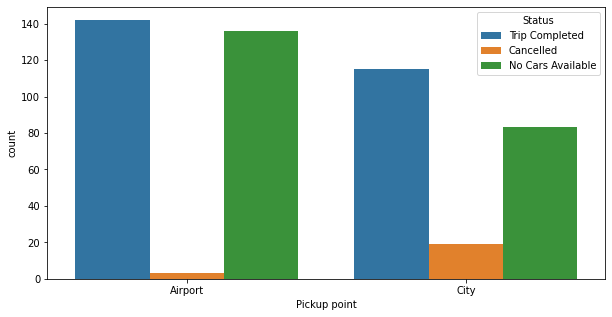

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_Late_Night,x='Pickup point',hue='Status')
plt.show()

In [35]:
df_Day_Time=df[df['Time_Slot']=='Day_Time']

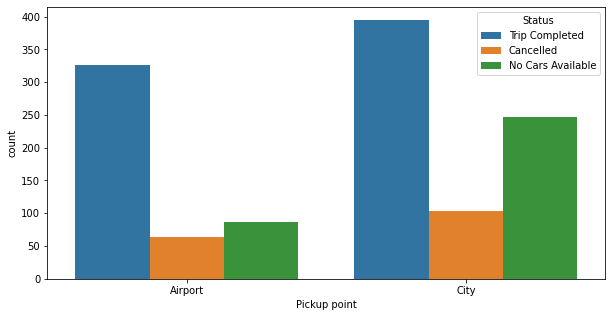

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_Day_Time,x='Pickup point',hue='Status')
plt.show()

In [37]:
airport = df[df['Pickup point'] == 'Airport']
city = df[df['Pickup point'] == 'City']

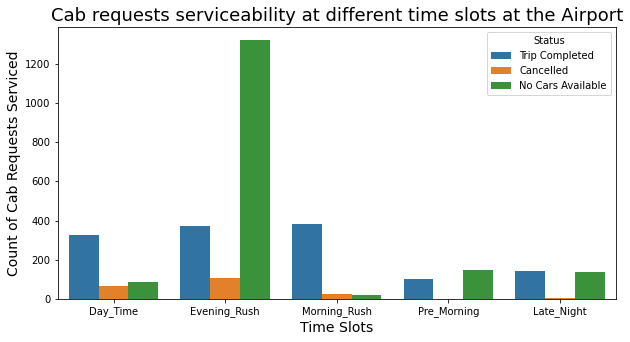

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "Time_Slot", hue = "Status", data = airport)
plt.title("Cab requests serviceability at different time slots at the Airport", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 14)
plt.show()

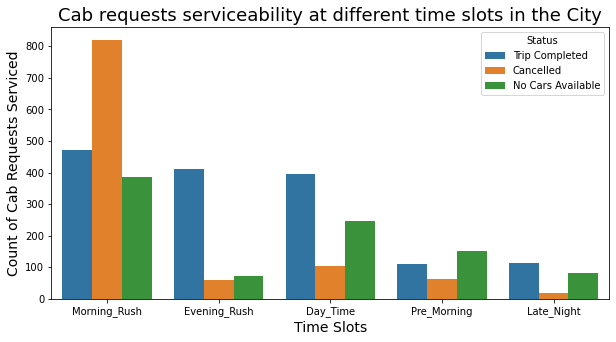

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "Time_Slot", hue = "Status", data = city)
plt.title("Cab requests serviceability at different time slots in the City", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 14)
plt.show()